### Initial

In [12]:
# packages
import sqlite3
import pandas as pd

In [13]:
# load data
df = pd.read_csv("../data/clean_fish_dataset.csv")

In [14]:
# take a peek
df.head()

,SpecCode,Genus,Species,FBname,Length,LTypeMaxM,Weight,BodyShapeI,Fresh,Brack,...,IUCN_Code,Resilience,Vulnerability,Aquarium,GameFish,Importance,UsedforAquaculture,SizeClass,CommercialStatus,ThreatenedStatus
0,64588,Aapticheilichthys,Aapticheilichthys websteri,NaN,3.08,SL,46243.196613,fusiform / normal,1,0,...,NE,Unkwon,10.00,never/rarely,0,Unknown,never/rarely,Small,0,0
1,16239,Aaptosyax,Aaptosyax grypus,Giant salmon carp,130.00,SL,30000.000000,fusiform / normal,1,0,...,CR,Very low,90.00,never/rarely,0,Unknown,never/rarely,Large,0,1
2,2347,Abactochromis,Abactochromis labrosus,NaN,11.50,SL,46243.196613,short and / or deep,1,0,...,LC,High,10.00,commercial,0,commercial,never/rarely,Small,1,0
3,62612,Abalistes,Abalistes filamentosus,NaN,32.50,SL,1375.000000,short and / or deep,0,0,...,LC,Medium,29.65,never/rarely,0,Unknown,never/rarely,Medium,0,0
4,9,Abalistes,Abalistes stellatus,Starry triggerfish,60.00,TL,46243.196613,short and / or deep,0,0,...,LC,Medium,44.00,commercial,0,commercial,never/rarely,Medium,1,0


In [15]:
# connect/create the db file
conn = sqlite3.connect("fish_species_project.db")

In [16]:
# df to db table called fish_species_traits
df.to_sql("fish_species_traits", conn, if_exists = "replace", index = False)

36856

In [17]:
# take a peek at the db
print(pd.read_sql("SELECT * FROM fish_species_traits LIMIT 5;", conn))

   SpecCode              Genus                     Species  \
0     64588  Aapticheilichthys  Aapticheilichthys websteri   
1     16239          Aaptosyax            Aaptosyax grypus   
2      2347      Abactochromis      Abactochromis labrosus   
3     62612          Abalistes      Abalistes filamentosus   
4         9          Abalistes         Abalistes stellatus   

               FBname  Length LTypeMaxM        Weight           BodyShapeI  \
0                None    3.08        SL  46243.196613    fusiform / normal   
1   Giant salmon carp  130.00        SL  30000.000000    fusiform / normal   
2                None   11.50        SL  46243.196613  short and / or deep   
3                None   32.50        SL   1375.000000  short and / or deep   
4  Starry triggerfish   60.00        TL  46243.196613  short and / or deep   

   Fresh  Brack  ...  IUCN_Code Resilience Vulnerability      Aquarium  \
0      1      0  ...         NE     Unkwon         10.00  never/rarely   
1      1  

In [35]:
# view columns
df = pd.read_sql("SELECT * FROM fish_species_traits LIMIT 1;", conn)
print(df.columns.tolist())

['SpecCode', 'Genus', 'Species', 'FBname', 'Length', 'LTypeMaxM', 'Weight', 'BodyShapeI', 'Fresh', 'Brack', 'Saltwater', 'DemersPelag', 'IUCN_Code', 'Resilience', 'Vulnerability', 'Aquarium', 'GameFish', 'Importance', 'UsedforAquaculture', 'SizeClass', 'CommercialStatus', 'ThreatenedStatus']


#### DB is now populated

---

### SQL query and plot

In [32]:
# SQL query
query1 = "SELECT Species, Weight, Length, CommercialStatus FROM fish_species_traits WHERE weight > 250;"
# new df based on 250+ grams
df_heavy_fish = pd.read_sql(query1, conn)

<Axes: xlabel='Length', ylabel='Weight'>

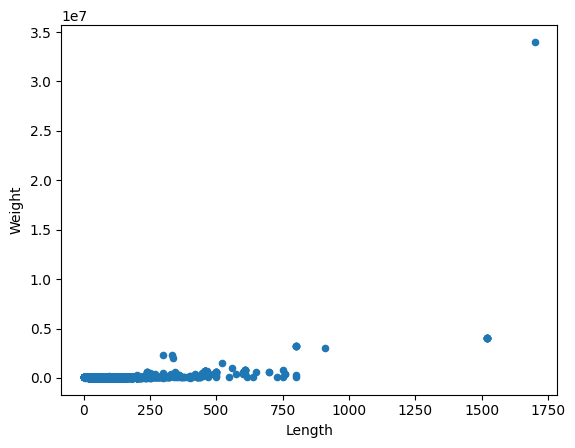

In [33]:
# plot
df_heavy_fish.plot.scatter(x='Length', y='Weight')

---

### SQL Continued

#### More Complex Query

In [36]:
query2 = """
SELECT Species, DemersPelag, AVG(Weight) as avg_weight, AVG(Length) as avg_length, CommercialStatus
FROM fish_species_traits
GROUP BY Species
HAVING avg_length < 500
ORDER BY avg_length DESC;
"""
df_length_summary = pd.read_sql(query2, conn)
df_length_summary

,Species,DemersPelag,avg_weight,avg_length,CommercialStatus
0,Alopias superciliosus,pelagic-oceanic,363800.000000,487.984985,1
1,Hippoglossus hippoglossus,demersal,320000.000000,470.000000,1
2,Anoxypristis cuspidata,benthopelagic,46243.196613,470.000000,1
3,Istiompax indica,pelagic-oceanic,750000.000000,465.000000,1
4,Thunnus thynnus,pelagic-oceanic,684000.000000,458.000000,1
...,...,...,...,...,...
35700,Leptophilypnion pusillus,demersal,46243.196613,0.910000,0
35701,Schindleria nana,reef-associated,46243.196613,0.900000,0
35702,Eviota deminuta,benthopelagic,46243.196613,0.870000,0
35703,Aspasmichthys alorensis,reef-associated,46243.196613,0.820000,0


#### Dynamic SQL

In [37]:
habitats = ["reef-associated", "bathydemersal", "pelagic"]
for item in habitats:
    query3 = f"SELECT * FROM fish_species_traits WHERE DemersPelag = '{item}'"
    df_habitat = pd.read_sql(query3, conn)
    print(f"\nTop Species in habitat: {item}")
    print(df_habitat.head(10))


Top Species in habitat: reef-associated
   SpecCode          Genus                    Species                 FBname  \
0     11144  Abantennarius       Abantennarius analis       Tailjet frogfish   
1     16680  Abantennarius  Abantennarius bermudensis        Island frogfish   
2      5402  Abantennarius    Abantennarius coccineus       Scarlet frogfish   
3      7294  Abantennarius   Abantennarius dorehensis   New Guinean frogfish   
4     69666  Abantennarius      Abantennarius drombus      Freckled frogfish   
5      5403  Abantennarius     Abantennarius nummifer       Spotfin frogfish   
6      7296  Abantennarius     Abantennarius rosaceus  Spiny-tufted frogfish   
7     13451  Abantennarius   Abantennarius sanguineus        Bloody frogfish   
8       972       Ablennes             Ablennes hians        Flat needlefish   
9      6652      Abudefduf      Abudefduf abdominalis       Green damselfish   

   Length LTypeMaxM        Weight           BodyShapeI  Fresh  Brack  ...  \
0

#### Modeling

In [39]:
# for linear regression
from sklearn.linear_model import LinearRegression

In [63]:
# df for prediction
df1 = pd.read_sql("SELECT Length, Fresh, Brack, Saltwater, Weight, Vulnerability, SpecCode FROM fish_species_traits WHERE Length IS NOT NULL", conn)

In [64]:
# drop any NULLs
df1 = df1.dropna()

In [65]:
# convert binary to int
for col in ['Fresh', 'Brack', 'Saltwater']:
    df1[col] = df1[col].astype(int)

In [66]:
# define x and y
x = df1[['Weight', 'Fresh', 'Brack', 'Saltwater', 'Vulnerability']]
y = df1['Length']

In [67]:
# fit the linear regression model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [68]:
# prediction column for db
df1["predicted_length"] = model.predict(x)

In [69]:
# predictions in new SQL table
df1.to_sql("fish_species_length_predictions", conn, if_exists = "replace", index = False)

36854

In [70]:
# print head
print(df1[["Length", "predicted_length"]].round(2).head(10))

   Length  predicted_length
0    3.08              8.23
1  130.00            157.60
2   11.50              8.23
3   32.50             42.22
4   60.00             73.31
5    7.80              9.20
6    7.60              9.20
7   13.00              9.20
8   14.00              9.20
9   12.00              9.20


In [71]:
# for model iinterpretation
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [72]:
# grab mse and r-squared values
mse = mean_squared_error(df1["Length"], df1["predicted_length"])
r2 = r2_score(df1["Length"], df1["predicted_length"])

In [73]:
# print
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared value: {r2:.2f}")

Mean Squared Error (MSE): 897.75
R-squared value: 0.63


The linear regression model produced an MSE of 897.75. This indicates that on average, the length predictions deviated from the
actual lengths by that value. 

The R-squared value is 0.63. The linear regression model explains 63% of the variance in fish species length. This value indicates
moderate predictive power given the available features.

---

### Ranking

In [ ]:
# table creation
table_create = """
CREATE TABLE fish_species_length_comparison AS
SELECT Length, predicted_length,
    ROUND(ABS(Length - predicted_length), 2) AS prediction_error
FROM fish_species_length_predictions;
"""
conn.execute(table_create)
conn.commit()

In [61]:
# top 10 worst length predictions
query_top10_worst_predictions = "SELECT * FROM fish_species_length_comparison ORDER BY prediction_error DESC Limit 10;"
df_top10_worst_predictions = pd.read_sql(query_top10_worst_predictions, conn)
print(df_top10_worst_predictions)

   Length  predicted_length  prediction_error
0  1700.0       3203.429173           1503.43
1  1520.0        507.733308           1012.27
2  1520.0        507.733308           1012.27
3  1520.0        507.733308           1012.27
4  1520.0        507.733308           1012.27
5  1520.0        507.733308           1012.27
6  1520.0        507.733308           1012.27
7  1520.0        507.733308           1012.27
8  1520.0        507.733308           1012.27
9   800.0        160.032331            639.97


---

### View

In [80]:
# length summary
view_create = """
CREATE VIEW view_length_summary AS
SELECT fish_species_length_predictions.Length AS actual_length,
    fish_species_length_predictions.predicted_length,
    ROUND(fish_species_length_predictions.predicted_length - fish_species_length_predictions.Length, 2) AS error,
    fish_species_traits.Genus,
    fish_species_traits.Species
FROM fish_species_length_predictions
JOIN fish_species_traits USING (SpecCode);
"""
conn.execute(view_create)
conn.commit()
df_view = pd.read_sql("SELECT * FROM view_length_summary LIMIT 10;", conn)
print(df_view)

   actual_length  predicted_length  error              Genus  \
0           3.08          8.228313   5.15  Aapticheilichthys   
1         130.00        157.596855  27.60          Aaptosyax   
2          11.50          8.228313  -3.27      Abactochromis   
3          32.50         42.221729   9.72          Abalistes   
4          60.00         73.306508  13.31          Abalistes   
5           7.80          9.204813   1.40      Abantennarius   
6           7.60          9.204813   1.60      Abantennarius   
7          13.00          9.204813  -3.80      Abantennarius   
8          14.00          9.204813  -4.80      Abantennarius   
9          12.00          9.204813  -2.80      Abantennarius   

                      Species  
0  Aapticheilichthys websteri  
1            Aaptosyax grypus  
2      Abactochromis labrosus  
3      Abalistes filamentosus  
4         Abalistes stellatus  
5        Abantennarius analis  
6   Abantennarius bermudensis  
7     Abantennarius coccineus  
8    Ab

In [82]:
# export view for potential future use
df_view = pd.read_sql("SELECT * FROM view_length_summary", conn)
df_view.to_csv("../data/view_length_summary.csv", index = False)

In [85]:
# generate markdown table of view
from tabulate import tabulate

In [86]:
# top 5
df_view = pd.read_sql("SELECT * FROM view_length_summary LIMIT 5;", conn)

In [87]:
# markdown conversion
markdown_table = tabulate(df_view, headers = "keys", tablefmt = "github", showindex = False)
print(markdown_table)

|   actual_length |   predicted_length |   error | Genus             | Species                    |
|-----------------|--------------------|---------|-------------------|----------------------------|
|            3.08 |            8.22831 |    5.15 | Aapticheilichthys | Aapticheilichthys websteri |
|          130    |          157.597   |   27.6  | Aaptosyax         | Aaptosyax grypus           |
|           11.5  |            8.22831 |   -3.27 | Abactochromis     | Abactochromis labrosus     |
|           32.5  |           42.2217  |    9.72 | Abalistes         | Abalistes filamentosus     |
|           60    |           73.3065  |   13.31 | Abalistes         | Abalistes stellatus        |


---